<a href="https://colab.research.google.com/github/KrishChothani/Computer-Vision-Using-Deep-Learning/blob/Temp/CVDLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(225, 225, 3)


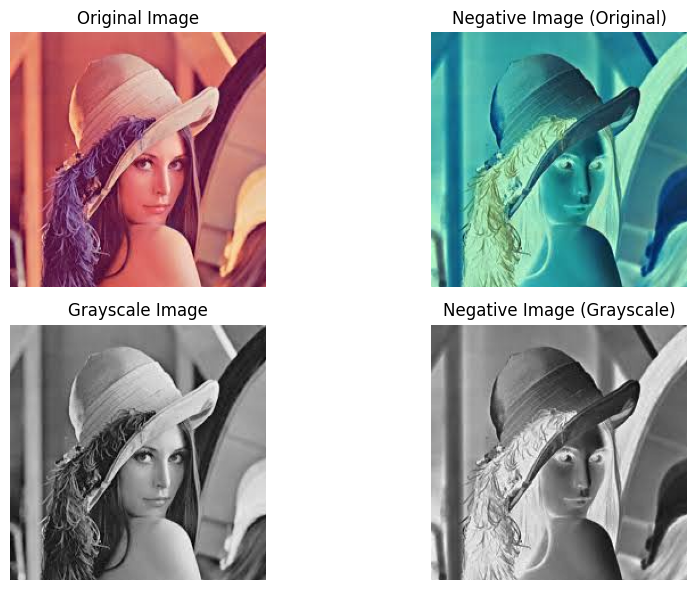

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_path = 'Lena.jpg'

original_image = cv2.imread(image_path)
print(original_image.shape)

def cvtGray(image):
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale

def image_negatives(image):
    negative = 255 - image
    return negative

grayscale_image = cvtGray(original_image)
image_negative = image_negatives(grayscale_image)
image_negative_original = image_negatives(original_image)

original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
negative_rgb = cv2.cvtColor(image_negative_original, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(original_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(negative_rgb)
plt.title("Negative Image (Original)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(image_negative, cmap='gray')
plt.title("Negative Image (Grayscale)")
plt.axis("off")

plt.tight_layout()
plt.show()



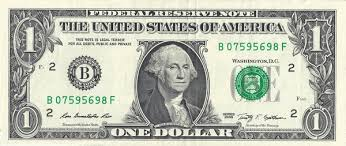

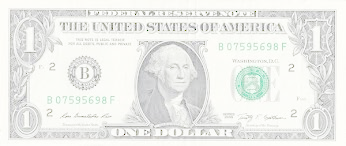

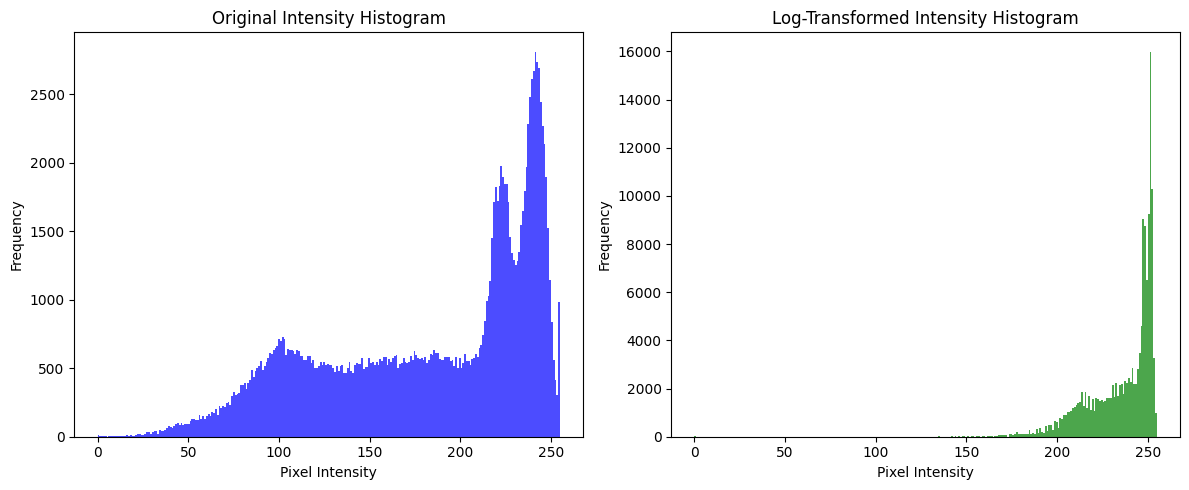

In [ ]:
def log_transform(image):
    image_float = image.astype(np.float32)

    c = 255 / np.log(1 + np.max(image_float))
    log_transformed = c * np.log(1 + image_float)

    log_transformed = np.clip(log_transformed, 0, 255)
    log_transformed = log_transformed.astype(np.uint8)

    return log_transformed

image_path = 'Currency.jpg'
original_image = cv2.imread(image_path)

log_transformImage = log_transform(original_image)
cv2_imshow(original_image)
cv2_imshow(log_transformImage)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(original_image.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title("Original Intensity Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(log_transformImage.ravel(), bins=256, range=(0, 255), color='green', alpha=0.7)
plt.title("Log-Transformed Intensity Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


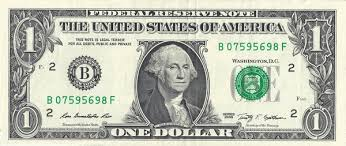

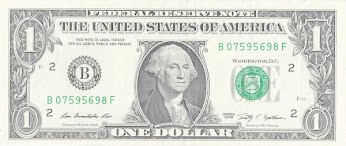

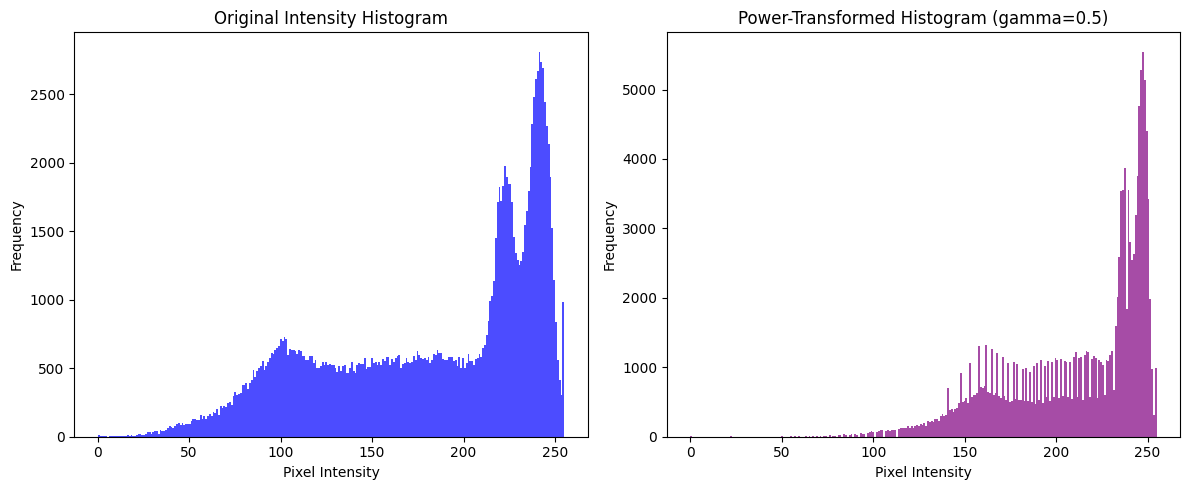

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

def power_law_transform(image, gamma=1.5):
    image_float = image.astype(np.float32) / 255.0
    power_transformed = np.power(image_float, gamma)
    power_transformed = power_transformed * 255
    power_transformed = np.clip(power_transformed, 0, 255)
    power_transformed = power_transformed.astype(np.uint8)
    return power_transformed

image_path = 'Currency.jpg'
original_image = cv2.imread(image_path)

gamma = 0.5
power_transform_image = power_law_transform(original_image, gamma=gamma)

cv2_imshow(original_image)
cv2_imshow(power_transform_image)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(original_image.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title("Original Intensity Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(power_transform_image.ravel(), bins=256, range=(0, 255), color='purple', alpha=0.7)
plt.title(f"Power-Transformed Histogram (gamma={gamma})")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



(500, 500, 3)


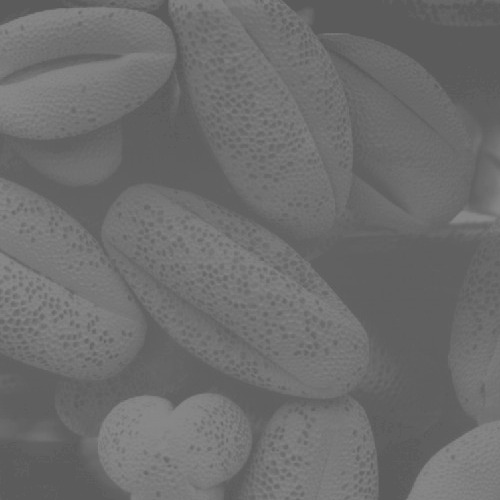

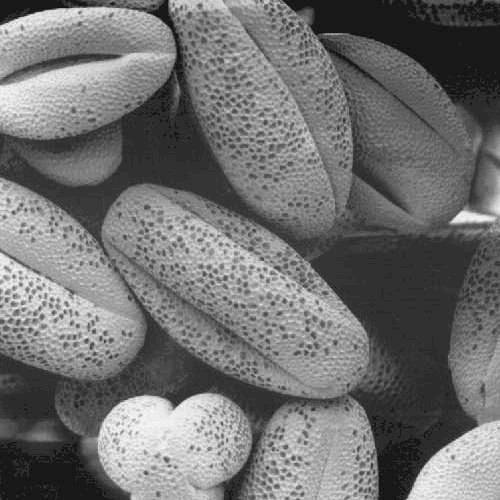

In [ ]:
import os
from google.colab.patches import cv2_imshow
import numpy as np


image_path = 'beans.jpg'
def contrastStretch(image) :
  min_val = np.min(image)
  max_val = np.max(image)
  image = ((image - min_val) / (max_val - min_val)) * 255
  return image


if os.path.exists(image_path):
    original_image = cv2.imread(image_path)
    print(original_image.shape)

    if original_image is not None:
        contrast_stretched_image = contrastStretch(original_image)
        cv2_imshow(original_image)
        cv2_imshow(contrast_stretched_image)

    else:
        print(f"Failed to read image at {image_path}")

else:
    print(f"File not found: {image_path}")

(256, 384, 3)


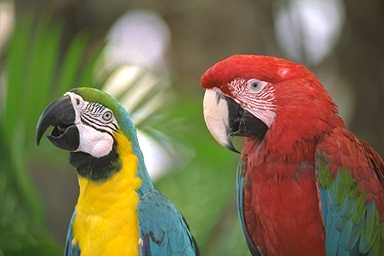

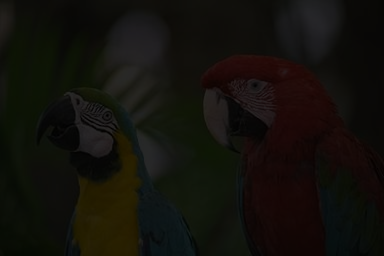

In [ ]:



image_path = 'Parrot.jpg'
def contrastStretch(image, new_min=0, new_max=40):
    min_val = np.min(image)
    max_val = np.max(image)

    stretched = ((image - min_val) / (max_val - min_val)) * (new_max - new_min) + new_min
    return stretched.astype(np.uint8)

if os.path.exists(image_path):
    original_image = cv2.imread(image_path)
    print(original_image.shape)

    if original_image is not None:
        contrast_stretched_image = contrastStretch(original_image)
        cv2_imshow(original_image)
        cv2_imshow(contrast_stretched_image)

    else:
        print(f"Failed to read image at {image_path}")

else:
    print(f"File not found: {image_path}")